In [52]:
from fastai.tabular import *
from fastai import *
from fastai.collab import *


In [53]:
path = Path('.')
path.ls()

[PosixPath('predict-ratings-collborative-filtering.ipynb'),
 PosixPath('faces_detected.jpg'),
 PosixPath('face_detection.ipynb'),
 PosixPath('reviews.zip'),
 PosixPath('scrap_notebook.ipynb'),
 PosixPath('models'),
 PosixPath('jpg_converted_png.jpg'),
 PosixPath('reviews.csv'),
 PosixPath('reviews_with_category.csv'),
 PosixPath('reviews-comments.ipynb'),
 PosixPath('reviews_with_category.csv.tgz'),
 PosixPath('data_fetch.ipynb'),
 PosixPath('reviews-comments-with-product-categories.ipynb'),
 PosixPath('.ipynb_checkpoints'),
 PosixPath('Predict-ratings-fastai-tabular.ipynb'),
 PosixPath('bg.jpg'),
 PosixPath('data_fetch_with_pandas.ipynb')]

In [54]:
df = pd.read_csv(path/'reviews_with_category.csv')
df.head()


,Unnamed: 0,product_id,product,brand,id,cosmetics_review_id,user_nickname,rating,review_text,review_title,...,IncentivizedReview,hairCondition,hairColor,beautyInsider,skinTone,age,eyeColor,hairConcerns,product_category_primary,product_category_secondary
0,0,f309a5aa-c47a-4c3c-9e7b-ff6cf2f71e7a,Balenciaga Paris,BALENCIAGA,0ba8b592-4a23-497e-a552-7a00d2aab624,09e96669-6277-48b1-9e81-a41adec3bea1,NaN,5,"Until now, this was only available at very hig...",My Favorite Perfume!,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fragrance,NaN
1,1,94d1384c-1b58-402f-96a8-30d82fb1a106,Pre-Shave Oil - Unscented,The Art of Shaving,9e4619a8-e16d-4a7e-8147-24648db5b06e,8d998af2-04ad-4ac9-8304-c29b798f6e80,charlie201,5,This is another excellent product that complim...,NaN,...,NaN,NaN,NaN,yes,NaN,35to44,NaN,NaN,Men,Shaving
2,2,3858badd-8a32-4775-996b-8f08197dffaf,Orange Sanguine Cologne Absolue Pure Perfume,Atelier Cologne,c839ee43-074b-48e6-98a9-1d2350192ec9,9332d1b1-abc0-43ee-b8f7-0aaf4fabf1df,sz123,1,This starts out smelling like a delieghtfully ...,I'll pass,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fragrance,NaN
3,3,f309a5aa-c47a-4c3c-9e7b-ff6cf2f71e7a,Balenciaga Paris,BALENCIAGA,fcd90538-4465-4ca3-8c27-734b4d81c6c8,09e96669-6277-48b1-9e81-a41adec3bea1,dolceragazza,5,I have received lots of compliments when I wea...,love it!!!!,...,NaN,NaN,NaN,yes,NaN,NaN,NaN,NaN,Fragrance,NaN
4,4,1a21cbc0-44c8-4581-bc3f-0f8b32292864,Glycolic Facial Cleanser,Anthony,4478b6f8-27a4-4585-a829-e7e3bb226f50,1bcabd81-b7ce-453c-bd39-5267272fc3ee,MouseRat,5,I grabbed this deluxe sample for my boyfriend ...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Men,NaN


In [55]:
relevant_df = df[['product_id', 
    'product', 
    'brand', 
    'user_nickname', 
    'rating', 
    'id',     
    'review_text',      
    'StaffContext', 
    'VerifiedPurchaser', 
    'skinConcerns', 
    'skinType',
    'IncentivizedReview',
    'hairCondition',
    'hairColor',
    'hairConcerns',                  
    'beautyInsider',    
    'skinTone',
    'age',
    'eyeColor',
    'product_category_primary',
    'product_category_secondary'
   ]]
relevant_df.head()

,product_id,product,brand,user_nickname,rating,id,review_text,StaffContext,VerifiedPurchaser,skinConcerns,...,IncentivizedReview,hairCondition,hairColor,hairConcerns,beautyInsider,skinTone,age,eyeColor,product_category_primary,product_category_secondary
0,f309a5aa-c47a-4c3c-9e7b-ff6cf2f71e7a,Balenciaga Paris,BALENCIAGA,NaN,5,0ba8b592-4a23-497e-a552-7a00d2aab624,"Until now, this was only available at very hig...",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fragrance,NaN
1,94d1384c-1b58-402f-96a8-30d82fb1a106,Pre-Shave Oil - Unscented,The Art of Shaving,charlie201,5,9e4619a8-e16d-4a7e-8147-24648db5b06e,This is another excellent product that complim...,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,yes,NaN,35to44,NaN,Men,Shaving
2,3858badd-8a32-4775-996b-8f08197dffaf,Orange Sanguine Cologne Absolue Pure Perfume,Atelier Cologne,sz123,1,c839ee43-074b-48e6-98a9-1d2350192ec9,This starts out smelling like a delieghtfully ...,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fragrance,NaN
3,f309a5aa-c47a-4c3c-9e7b-ff6cf2f71e7a,Balenciaga Paris,BALENCIAGA,dolceragazza,5,fcd90538-4465-4ca3-8c27-734b4d81c6c8,I have received lots of compliments when I wea...,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,yes,NaN,NaN,NaN,Fragrance,NaN
4,1a21cbc0-44c8-4581-bc3f-0f8b32292864,Glycolic Facial Cleanser,Anthony,MouseRat,5,4478b6f8-27a4-4585-a829-e7e3bb226f50,I grabbed this deluxe sample for my boyfriend ...,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Men,NaN


### Deduplicate comments

In [56]:
dedup_revelant_df = relevant_df.drop_duplicates(subset=['product_id', 'user_nickname', 'review_text'], keep='first', inplace=False)
dedup_revelant_df.shape
dedup_revelant_df

,product_id,product,brand,user_nickname,rating,id,review_text,StaffContext,VerifiedPurchaser,skinConcerns,...,IncentivizedReview,hairCondition,hairColor,hairConcerns,beautyInsider,skinTone,age,eyeColor,product_category_primary,product_category_secondary
0,f309a5aa-c47a-4c3c-9e7b-ff6cf2f71e7a,Balenciaga Paris,BALENCIAGA,NaN,5,0ba8b592-4a23-497e-a552-7a00d2aab624,"Until now, this was only available at very hig...",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fragrance,NaN
1,94d1384c-1b58-402f-96a8-30d82fb1a106,Pre-Shave Oil - Unscented,The Art of Shaving,charlie201,5,9e4619a8-e16d-4a7e-8147-24648db5b06e,This is another excellent product that complim...,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,yes,NaN,35to44,NaN,Men,Shaving
2,3858badd-8a32-4775-996b-8f08197dffaf,Orange Sanguine Cologne Absolue Pure Perfume,Atelier Cologne,sz123,1,c839ee43-074b-48e6-98a9-1d2350192ec9,This starts out smelling like a delieghtfully ...,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fragrance,NaN
3,f309a5aa-c47a-4c3c-9e7b-ff6cf2f71e7a,Balenciaga Paris,BALENCIAGA,dolceragazza,5,fcd90538-4465-4ca3-8c27-734b4d81c6c8,I have received lots of compliments when I wea...,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,yes,NaN,NaN,NaN,Fragrance,NaN
4,1a21cbc0-44c8-4581-bc3f-0f8b32292864,Glycolic Facial Cleanser,Anthony,MouseRat,5,4478b6f8-27a4-4585-a829-e7e3bb226f50,I grabbed this deluxe sample for my boyfriend ...,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Men,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
376408,ecd25af0-2a66-4828-89b2-6976e45ff1a6,"BIRTHDAY GIFT KVD BEAUTY TATTOO LINER, SETTING...",Kat Von D,ReginaMariaEliz,1,9ca6cb58-3c93-4b76-93b9-63964d9a851c,I don't understand people's obsession with thi...,False,NaN,blackheads,...,True,NaN,brunette,Thinning,NaN,medium,25to34,brown,NaN,NaN
376409,ecd25af0-2a66-4828-89b2-6976e45ff1a6,"BIRTHDAY GIFT KVD BEAUTY TATTOO LINER, SETTING...",Kat Von D,beyonka1,4,4ac7f271-b618-4989-88ad-80dbf8ba3b60,It’s a small birthday gift so don’t expect som...,False,NaN,NaN,...,False,NaN,black,NaN,NaN,deep,NaN,gray,NaN,NaN
376410,ecd25af0-2a66-4828-89b2-6976e45ff1a6,"BIRTHDAY GIFT KVD BEAUTY TATTOO LINER, SETTING...",Kat Von D,thelovelyrach,2,653a357f-21a5-469a-9ce7-8a8048f50622,Lipstick set way too small. Don’t think the ta...,False,NaN,acne,...,True,dry,brunette,AntiAging,NaN,porcelain,NaN,hazel,NaN,NaN
376411,ecd25af0-2a66-4828-89b2-6976e45ff1a6,"BIRTHDAY GIFT KVD BEAUTY TATTOO LINER, SETTING...",Kat Von D,imarylin09,5,2f45ca40-55c9-4476-9c29-124c4ac128de,NaN,False,NaN,NaN,...,True,NaN,brunette,CurlyEnhancing,NaN,medium,18to24,brown,NaN,NaN


In [57]:
analysis_df = dedup_revelant_df[['product_id', 
    'product', 
    'brand', 
    'user_nickname', 
    'rating',    
    'StaffContext', 
    'VerifiedPurchaser', 
    'skinConcerns', 
    'skinType',
    'IncentivizedReview',
    'hairCondition',
    'hairColor',
    'beautyInsider',    
    'skinTone',
    'hairConcerns',                                     
    'age',
    'eyeColor',
    'product_category_primary',
    'product_category_secondary'
   ]]


analysis_df['product_id_name'] = df['product_id'] + " " + df['product'].astype(str) + " " + df['brand'].astype(str)
analysis_df.head()

/home/sidravic/Dropbox/code/workspace/rails_apps/idylmynds/data_preprocessing/venv/lib/python3.6/site-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,product_id,product,brand,user_nickname,rating,StaffContext,VerifiedPurchaser,skinConcerns,skinType,IncentivizedReview,hairCondition,hairColor,beautyInsider,skinTone,hairConcerns,age,eyeColor,product_category_primary,product_category_secondary,product_id_name
0,f309a5aa-c47a-4c3c-9e7b-ff6cf2f71e7a,Balenciaga Paris,BALENCIAGA,NaN,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fragrance,NaN,f309a5aa-c47a-4c3c-9e7b-ff6cf2f71e7a Balenciag...
1,94d1384c-1b58-402f-96a8-30d82fb1a106,Pre-Shave Oil - Unscented,The Art of Shaving,charlie201,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,yes,NaN,NaN,35to44,NaN,Men,Shaving,94d1384c-1b58-402f-96a8-30d82fb1a106 Pre-Shave...
2,3858badd-8a32-4775-996b-8f08197dffaf,Orange Sanguine Cologne Absolue Pure Perfume,Atelier Cologne,sz123,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fragrance,NaN,3858badd-8a32-4775-996b-8f08197dffaf Orange Sa...
3,f309a5aa-c47a-4c3c-9e7b-ff6cf2f71e7a,Balenciaga Paris,BALENCIAGA,dolceragazza,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,yes,NaN,NaN,NaN,NaN,Fragrance,NaN,f309a5aa-c47a-4c3c-9e7b-ff6cf2f71e7a Balenciag...
4,1a21cbc0-44c8-4581-bc3f-0f8b32292864,Glycolic Facial Cleanser,Anthony,MouseRat,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Men,NaN,1a21cbc0-44c8-4581-bc3f-0f8b32292864 Glycolic ...


### Rearrange

In [67]:
analysis_df = analysis_df[[
    'user_nickname',
    'product_id_name',            
    'rating'   
   ]]
analysis_df.dropna(inplace=True)

analysis_df.head()


,user_nickname,product_id_name,rating
1,charlie201,94d1384c-1b58-402f-96a8-30d82fb1a106 Pre-Shave...,5
2,sz123,3858badd-8a32-4775-996b-8f08197dffaf Orange Sa...,1
3,dolceragazza,f309a5aa-c47a-4c3c-9e7b-ff6cf2f71e7a Balenciag...,5
4,MouseRat,1a21cbc0-44c8-4581-bc3f-0f8b32292864 Glycolic ...,5
5,MaggieV18,1a21cbc0-44c8-4581-bc3f-0f8b32292864 Glycolic ...,5


In [93]:
analysis_df['user_id'] = analysis_df['user_nickname'].astype('category').cat.codes
analysis_df['product_code'] = analysis_df['product_id_name'].astype('category').cat.codes
analysis_df

# group_by_df = analysis_df.groupby(['user_nickname']).count().sort_values(['rating'], ascending=False)
# group_by_df

data_df = analysis_df[['user_id', 'product_code', 'rating']]
data_df

,user_id,product_code,rating
1,57153,1400,5
2,103755,575,1
3,61998,2342,5
4,31785,263,5
5,28104,263,5
...,...,...,...
376408,36816,2267,1
376409,53258,2267,4
376410,105012,2267,2
376411,69762,2267,5


### Train

In [68]:
doc(CollabDataBunch)

In [95]:
data = (CollabDataBunch.from_df(data_df, 
                                seed=42, 
                                valid_pct=0.2,                                 
                                item_name='product_code'                                
                               ))

In [96]:
data.show_batch(rows=15)

user_id,product_code,target
82589,1642,5.0
98860,1376,4.0
73309,1847,4.0
25150,612,5.0
5758,1781,5.0
94514,843,1.0
10487,1948,5.0
82436,1335,4.0
41842,1539,1.0
109598,1131,5.0


In [71]:
doc(collab_learner)

In [97]:
learner = collab_learner(data, n_factors=40, y_range=[0,5], wd=1e-1)

epoch,train_loss,valid_loss,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 5.25E-01
Min loss divided by 10: 5.25E-02


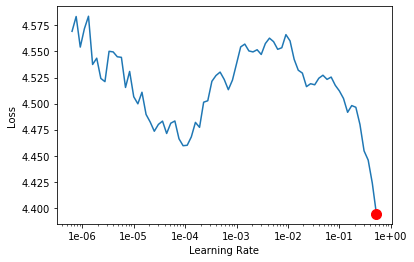

In [98]:
learner.lr_find()
learner.recorder.plot(suggestion=True, skip_end=15)


In [99]:
learner.fit_one_cycle(4, max_lr=3e-01)

epoch,train_loss,valid_loss,time
0,2.709592,2.748707,01:17
1,2.668971,2.658966,01:53
2,2.422430,2.357050,01:30
3,2.160908,2.118964,01:16


epoch,train_loss,valid_loss,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 6.31E-07
Min loss divided by 10: 2.29E-07


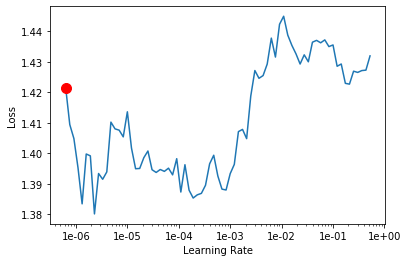

In [100]:
learner.lr_find()
learner.recorder.plot(suggestion=True, skip_end=15)


In [101]:
learner.fit_one_cycle(3, max_lr=1e-06)


epoch,train_loss,valid_loss,time
0,1.414217,2.118999,01:18
1,1.455400,2.119048,01:38
2,1.461103,2.119061,01:20


In [103]:
learner.save('collab-filter')

### Interpretation

In [105]:
learner.load('collab-filter')

CollabLearner(data=TabularDataBunch;

Train: LabelList (112599 items)
x: CollabList
user_id 103755; product_code 575; ,user_id 61998; product_code 2342; ,user_id 31785; product_code 263; ,user_id 28104; product_code 263; ,user_id 60098; product_code 263; 
y: FloatList
1.0,5.0,5.0,5.0,4.0
Path: .;

Valid: LabelList (28149 items)
x: CollabList
user_id #na#; product_code 1892; ,user_id #na#; product_code 374; ,user_id #na#; product_code 270; ,user_id 7927; product_code 1305; ,user_id #na#; product_code 1544; 
y: FloatList
5.0,5.0,5.0,5.0,3.0
Path: .;

Test: None, model=EmbeddingDotBias(
  (u_weight): Embedding(90953, 40)
  (i_weight): Embedding(2444, 40)
  (u_bias): Embedding(90953, 1)
  (i_bias): Embedding(2444, 1)
), opt_func=functools.partial(<class 'torch.optim.adam.Adam'>, betas=(0.9, 0.99)), loss_func=FlattenedLoss of MSELoss(), metrics=[], true_wd=True, bn_wd=True, wd=0.1, train_bn=True, path=PosixPath('.'), model_dir='models', callback_fns=[functools.partial(<class 'fastai.basic_t

In [106]:
learner.model

EmbeddingDotBias(
  (u_weight): Embedding(90953, 40)
  (i_weight): Embedding(2444, 40)
  (u_bias): Embedding(90953, 1)
  (i_bias): Embedding(2444, 1)
)

In [152]:
analysis_df

,user_nickname,product_id_name,rating,user_id,product_code
1,charlie201,94d1384c-1b58-402f-96a8-30d82fb1a106 Pre-Shave...,5,57153,1400
2,sz123,3858badd-8a32-4775-996b-8f08197dffaf Orange Sa...,1,103755,575
3,dolceragazza,f309a5aa-c47a-4c3c-9e7b-ff6cf2f71e7a Balenciag...,5,61998,2342
4,MouseRat,1a21cbc0-44c8-4581-bc3f-0f8b32292864 Glycolic ...,5,31785,263
5,MaggieV18,1a21cbc0-44c8-4581-bc3f-0f8b32292864 Glycolic ...,5,28104,263
...,...,...,...,...,...
376408,ReginaMariaEliz,ecd25af0-2a66-4828-89b2-6976e45ff1a6 BIRTHDAY ...,1,36816,2267
376409,beyonka1,ecd25af0-2a66-4828-89b2-6976e45ff1a6 BIRTHDAY ...,4,53258,2267
376410,thelovelyrach,ecd25af0-2a66-4828-89b2-6976e45ff1a6 BIRTHDAY ...,2,105012,2267
376411,imarylin09,ecd25af0-2a66-4828-89b2-6976e45ff1a6 BIRTHDAY ...,5,69762,2267


In [189]:
product_ratings = data_df.groupby('product_id_name')['rating'].count()


top_rated_products = product_ratings.sort_values(ascending=False).index.values[:1000]
top_rated_products[:10]


array(['48da7f10-8e8e-43ee-8b27-7906d6d67ced 8G Dietary Supplement 8Greens',
       'c4ec6e70-3cb8-493a-a3b0-691537866ff3 Vanilla Woods Eau de Parfum The 7 Virtues',
       '2244c916-ca81-45cf-8aaf-bd013d7edf33 TOP SECRETS Instant Matte Pore Refiner Yves Saint Laurent',
       'fd98e92d-adfc-482b-9dcc-38681a35beba CAVIAR Anti-Aging&#xAE; Smoothing Anti-Frizz Blowout Butter ALTERNA Haircare',
       'a1f326af-7bfe-49a9-aa44-0351e619b6fa Libre Eau De Parfum Yves Saint Laurent',
       '40861381-e92a-46ba-aa07-3456a6abb083 CAVIAR Anti-Aging&#xAE; Restructuring Bond Repair 3-in-1 Sealing Serum ALTERNA Haircare',
       '12fa41df-4711-4c2d-8a1e-5e81df5e319a All Hours Concealer Yves Saint Laurent',
       'e32a8f0a-d88c-4d27-a8a8-a59696fea1c4 CAVIAR Anti-Aging&#xAE; Smoothing Anti-Frizz Nourishing Oil ALTERNA Haircare',
       'e4046333-b035-46d0-bbff-b2051984771a CC Me Vitamin C Serum Summer Fridays',
       '770f2c78-71bd-44bf-8cab-0a2760688412 Mile High Club Mascara Wander Beauty'], dtype

### Product Bias

In [190]:
product_bias = learner.bias(top_products, is_item=True)

You're trying to access an item that isn't in the training data.
                  If it was in your original data, it may have been split such that it's only in the validation set now.


TypeError: embedding(): argument 'indices' (position 2) must be Tensor, not NoneType